## Carregando bibliotecas e funções necessárias



In [21]:
import pandas as pd
import numpy as np
import pylab
import sklearn
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo as bases de dados

In [2]:
df = pd.read_csv("bd.csv")

## Análise exploratória de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164394 entries, 0 to 164393
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Mental_Health      164394 non-null  object
 1   Employment         164394 non-null  object
 2   Gender             164394 non-null  object
 3   Income             164394 non-null  object
 4   children           164394 non-null  object
 5   Physical_Activity  164394 non-null  object
 6   Race               164394 non-null  object
 7   body_mass_index    164394 non-null  object
 8   Education          164394 non-null  object
 9   Marital            164394 non-null  object
 10  Deaf               164394 non-null  object
 11  Blind              164394 non-null  object
 12  Concentrating      164394 non-null  object
 13  Walking            164394 non-null  object
 14  Dressing           164394 non-null  object
 15  Errands_Alone      164394 non-null  object
 16  Alcohol            1

In [4]:
df.head()

,Mental_Health,Employment,Gender,Income,children,Physical_Activity,Race,body_mass_index,Education,Marital,...,Errands_Alone,Alcohol,Smoke,Heart_Disease,Stroke,Depression,Diabetes,COP,Skin_Cancer,Cancer
0,Good,no,female,35k - 50k,no children,no physical activity,White,Overweight,Graduated High School,Never married,...,no,yes,no,no,no,yes,No,no,no,no
1,Bad,yes,female,25k - 35k,no children,had physical activity,White,Obese,Graduated High School,Married,...,no,no,no,no,no,no,No,no,no,yes
2,Good,no,male,25k - 35k,no children,had physical activity,White,Overweight,Graduated High School,Married,...,no,no,no,no,no,no,No,no,yes,no
3,Good,no,male,150k - 200k,two children,had physical activity,White,Overweight,Graduated from College or Technical School,Married,...,no,yes,no,no,no,no,No,no,no,no
4,Good,no,male,100k - 150k,no children,had physical activity,White,Overweight,Graduated from College or Technical School,Married,...,no,no,no,no,no,no,No,yes,no,no


In [22]:
eda = sv.analyze(df)


                                             |                                                                …

In [23]:
eda.show_html(open_browser=True)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Pré-processamento de dados



Transformando os dados em dummies tendo em vista que todas as variáveis são categóricas. 

In [5]:
df = pd.get_dummies(df, drop_first=True)
df

,Mental_Health_Good,Employment_yes,Gender_male,Income_100k - 150k,Income_150k - 200k,Income_15K - 20K,Income_200k or more,Income_20k - 25k,Income_25k - 35k,Income_35k - 50k,...,Smoke_yes,Heart_Disease_yes,Stroke_yes,Depression_yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, only during pregnancy",COP_yes,Skin_Cancer_yes,Cancer_yes
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164389,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164390,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
164391,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164392,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0


Vamos dividir as bases em treino e teste

In [8]:
X = df.iloc[:,1:52]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Modelo 1 - Random Forest

Aqui vamos incluir um conjunto de hiperparâmetros para testarmos na otimização

In [9]:
# número de árvores
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# features em cada split
max_features = ['auto', 'sqrt']
# número de níveis da árvore
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de amostras para dividir um nó
min_samples_split = [2, 5, 10]
# Número de amostras por nó 
min_samples_leaf = [1, 2, 4]
# uso de bootstrapping
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [10]:
rf = RandomForestClassifier(random_state = 42) 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                               n_iter = 10, cv = 5, verbose = 2, random_state = 42,
                               n_jobs = -1, return_train_score = True, scoring = 'roc_auc')

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=2)

In [12]:
best_rf_random = rf_random.best_params_

In [14]:
#previsão do modelo
previsao = rf_random.predict(X_test)

In [15]:
previsao

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [16]:
#Acuracia

Acuracia = np.mean(y_test == previsao) 

print(Acuracia)

0.7036862434988899


### **Matriz de Confusão - Classificação**

In [17]:
#verificando a matriz de confusão
matriz_confusao = confusion_matrix (y_test, previsao)
print(matriz_confusao)

[[11006 15533]
 [ 3952 35267]]


<AxesSubplot:>

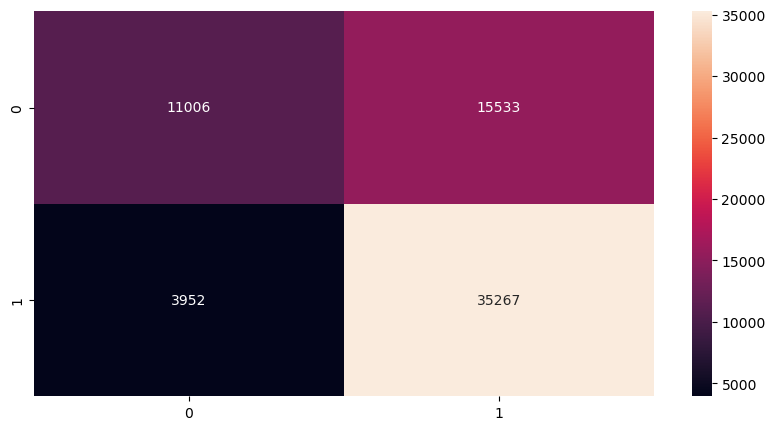

In [18]:
#grafico de visualização
plt.figure(figsize =(10,5))
sns.heatmap(matriz_confusao, annot = True, fmt='.0f')

In [19]:
#verificando o modelo

from sklearn.metrics import classification_report

report = classification_report (y_test, previsao)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.41      0.53     26539
           1       0.69      0.90      0.78     39219

    accuracy                           0.70     65758
   macro avg       0.72      0.66      0.66     65758
weighted avg       0.71      0.70      0.68     65758



### ***Validação Cruzada - classificação***



In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

0.6744406559477335

# **Arvore de Decisão - Regressão**

In [ ]:
#biblioteca - Arvore de Decisão (regressão)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#max_depth = quantidade de divisões

arvore_decisao = DecisionTreeRegressor( max_depth= 3, random_state= 0) #OUTRO PARAMENTO -> min_samples_leaf
arvore_decisao.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
pred_arv_decisao = arvore_decisao.predict(X_valid)

np.sqrt (mean_squared_error (y_valid, pred_arv_decisao))

0.48990270850592355

[Text(0.5, 0.875, 'Diabetes <= 1.5\nsquared_error = 0.241\nsamples = 131516\nvalue = 0.403'),
 Text(0.25, 0.625, 'Diabetes <= 0.5\nsquared_error = 0.24\nsamples = 127837\nvalue = 0.401'),
 Text(0.125, 0.375, 'Cancer <= 0.5\nsquared_error = 0.241\nsamples = 117346\nvalue = 0.405'),
 Text(0.0625, 0.125, 'squared_error = 0.241\nsamples = 111786\nvalue = 0.405'),
 Text(0.1875, 0.125, 'squared_error = 0.239\nsamples = 5560\nvalue = 0.396'),
 Text(0.375, 0.375, 'Cancer <= 0.5\nsquared_error = 0.23\nsamples = 10491\nvalue = 0.358'),
 Text(0.3125, 0.125, 'squared_error = 0.229\nsamples = 9540\nvalue = 0.355'),
 Text(0.4375, 0.125, 'squared_error = 0.236\nsamples = 951\nvalue = 0.381'),
 Text(0.75, 0.625, 'Diabetes <= 2.5\nsquared_error = 0.249\nsamples = 3679\nvalue = 0.464'),
 Text(0.625, 0.375, 'Cancer <= 0.5\nsquared_error = 0.248\nsamples = 1298\nvalue = 0.547'),
 Text(0.5625, 0.125, 'squared_error = 0.248\nsamples = 1254\nvalue = 0.547'),
 Text(0.6875, 0.125, 'squared_error = 0.248\nsampl

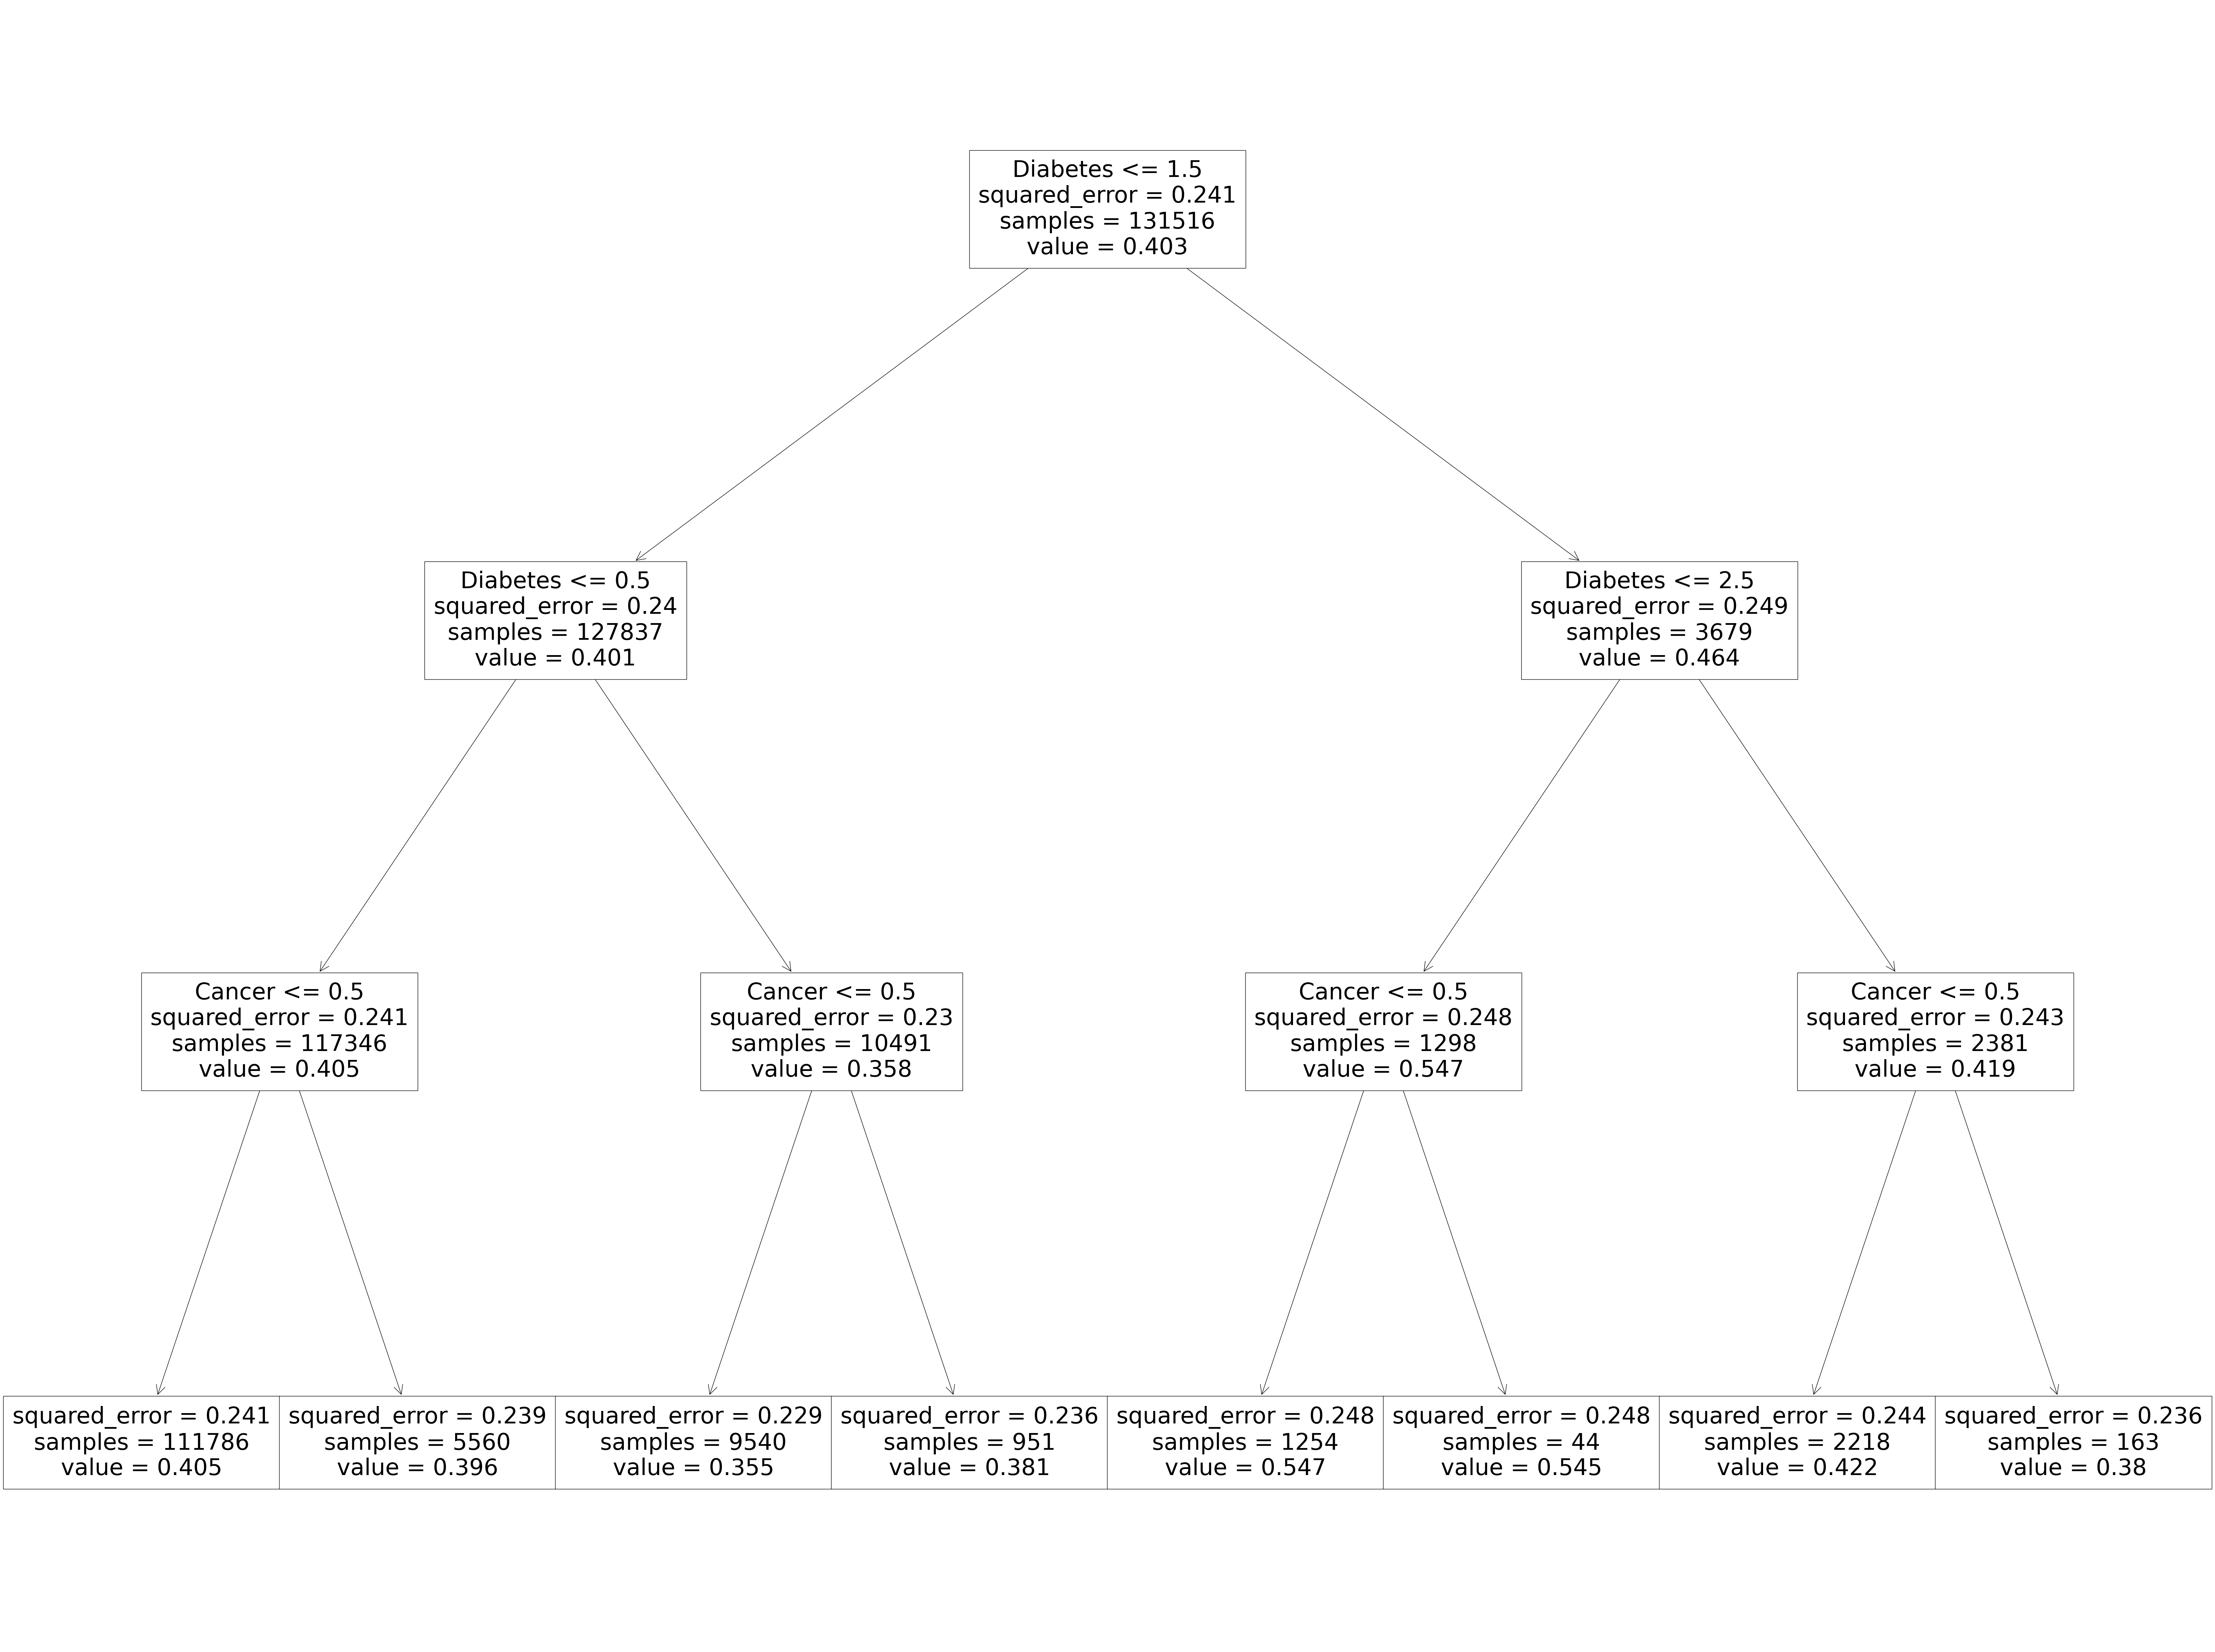

In [ ]:
#pylab aumenta a vizual da figura
pylab.figure(figsize=(80,60))

#plot do infrografico
plot_tree(arvore_decisao, feature_names = X_treino.columns)

# **Shapley values** 

Ajudar a interpretar os resultados dos algoritimos de uma maneira mais clara e intuitiva. 

**1. Organizando os dados**



In [ ]:
#biliotecas necessária

import numpy as np
%matplotlib inline
from  sklearn.ensemble  import RandomForestClassifier 

In [ ]:
#retornando ao modelo de Floresta aleatoria 

#Preparando os dados em treino e teste

from sklearn.model_selection import train_test_split

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) # 30%



In [ ]:
modelo_floresta_aleatoria_2 = RandomForestClassifier(n_estimators=100,random_state = 0) 

modelo_floresta_aleatoria_2.fit (X_treino, y_treino)

RandomForestClassifier(random_state=0)

In [ ]:
previsao_2 = modelo_floresta_aleatoria_2.predict(X_valid)

In [ ]:
#verificando o modelo
from sklearn.metrics import classification_report

report = classification_report (y_valid, previsao_2)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.75     29472
           1       0.55      0.01      0.03     19847

    accuracy                           0.60     49319
   macro avg       0.58      0.50      0.39     49319
weighted avg       0.58      0.60      0.46     49319



# **XGboost**

(considerado um dos melhores modelos)


Pega os resultados das arvores anteriores e treina com base na diferença, de forma conjugada, pegando sempre as respostas e diferenças anteriores (boosting)

In [ ]:
#bibliotecas

import os,sys
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Preparando os dados em treino e teste
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) # 30%



**1. Classificação**


In [ ]:
#treinando o modelo - Classificação

xg = XGBClassifier(max_depth=6)
xg.fit(X_treino, y_treino)

In [ ]:
#avaliando o modelo
prev_xg = xg.predict(X_valid)
print(accuracy_score(y_valid, prev_xg)*100)


77.98507462686567


In [ ]:
#treinando o modelo - mudando o booster dart

xg = XGBClassifier(booster='dart',)
xg.fit(X_treino, y_treino)
prev_xg = xg.predict(X_valid)
print(accuracy_score(y_valid, prev_xg)*100)

77.98507462686567


In [ ]:
#treinando o modelo - mudando o booster gblinear

xg = XGBClassifier(booster='gblinear',)
xg.fit(X_treino, y_treino)
prev_xg = xg.predict(X_valid)
print(accuracy_score(y_valid, prev_xg)*100)

78.35820895522389


*Mudando os seguintes parametros*

1. learning_rate= controla a rapidez que o modelo adapta ao problema. Varia de 0.0 a 1.0
2. n_estimators = O número de árvores
3. max_depth= A profundidade máxima da árvore

In [ ]:
xg = XGBClassifier(learning_rate= 0.04, n_estimators = 300,max_depth= 4, random_state = 0)
xg.fit(X_treino, y_treino)
prev_xg = xg.predict(X_valid)
print(accuracy_score(y_valid, prev_xg)*100)

80.59701492537313


In [ ]:
xg = XGBClassifier(learning_rate= 0.03, n_estimators = 300,max_depth= 6, random_state = 0)
xg.fit(X_treino, y_treino)
prev_xg = xg.predict(X_valid)
print(accuracy_score(y_valid, prev_xg)*100)

79.8507462686567


In [ ]:
xg = XGBClassifier(learning_rate= 0.08, n_estimators = 1100,max_depth= 6, random_state = 0)
xg.fit(X_treino, y_treino)
prev_xg = xg.predict(X_valid)
print(accuracy_score(y_valid, prev_xg)*100)

79.1044776119403


**2. Regressão**


In [ ]:
#Preparando os dados em treino e teste

from sklearn.model_selection import train_test_split

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) # 30%

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

xg = XGBRegressor(max_depth=6)
xg.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#ERRO

prev_xg_reg = xg.predict(X_valid)
mean_squared_error(y_valid, prev_xg_reg) #previsão do erro

2139.1973910257066

**observação**

1. importante ajustar os parametros para melhorar o erro 

            *base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None...*

2. Olhar as bibliotecas para compreender o que faz cada parametro 

-------------------------------------------------------------


# **Catboost**

1. tem trazido as melhores precisões da classe (Target)
2. se entrega facilmente as estruturas de aprendizado profundas
3. O algoritmo é uma implementação de gradiant boosting que usa árvores de decisão binárias como preditores base. Durante o treinamento, ele cria um conjunto de árvores de decisão continuamente. Cada árvore seguinte é construída reduzindo o loss comparado com com as anteriores.

**1. Regressão**

In [ ]:
#instalação
!pip install catboost

In [ ]:
#bibliotecas
import seaborn as sns #graficos
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

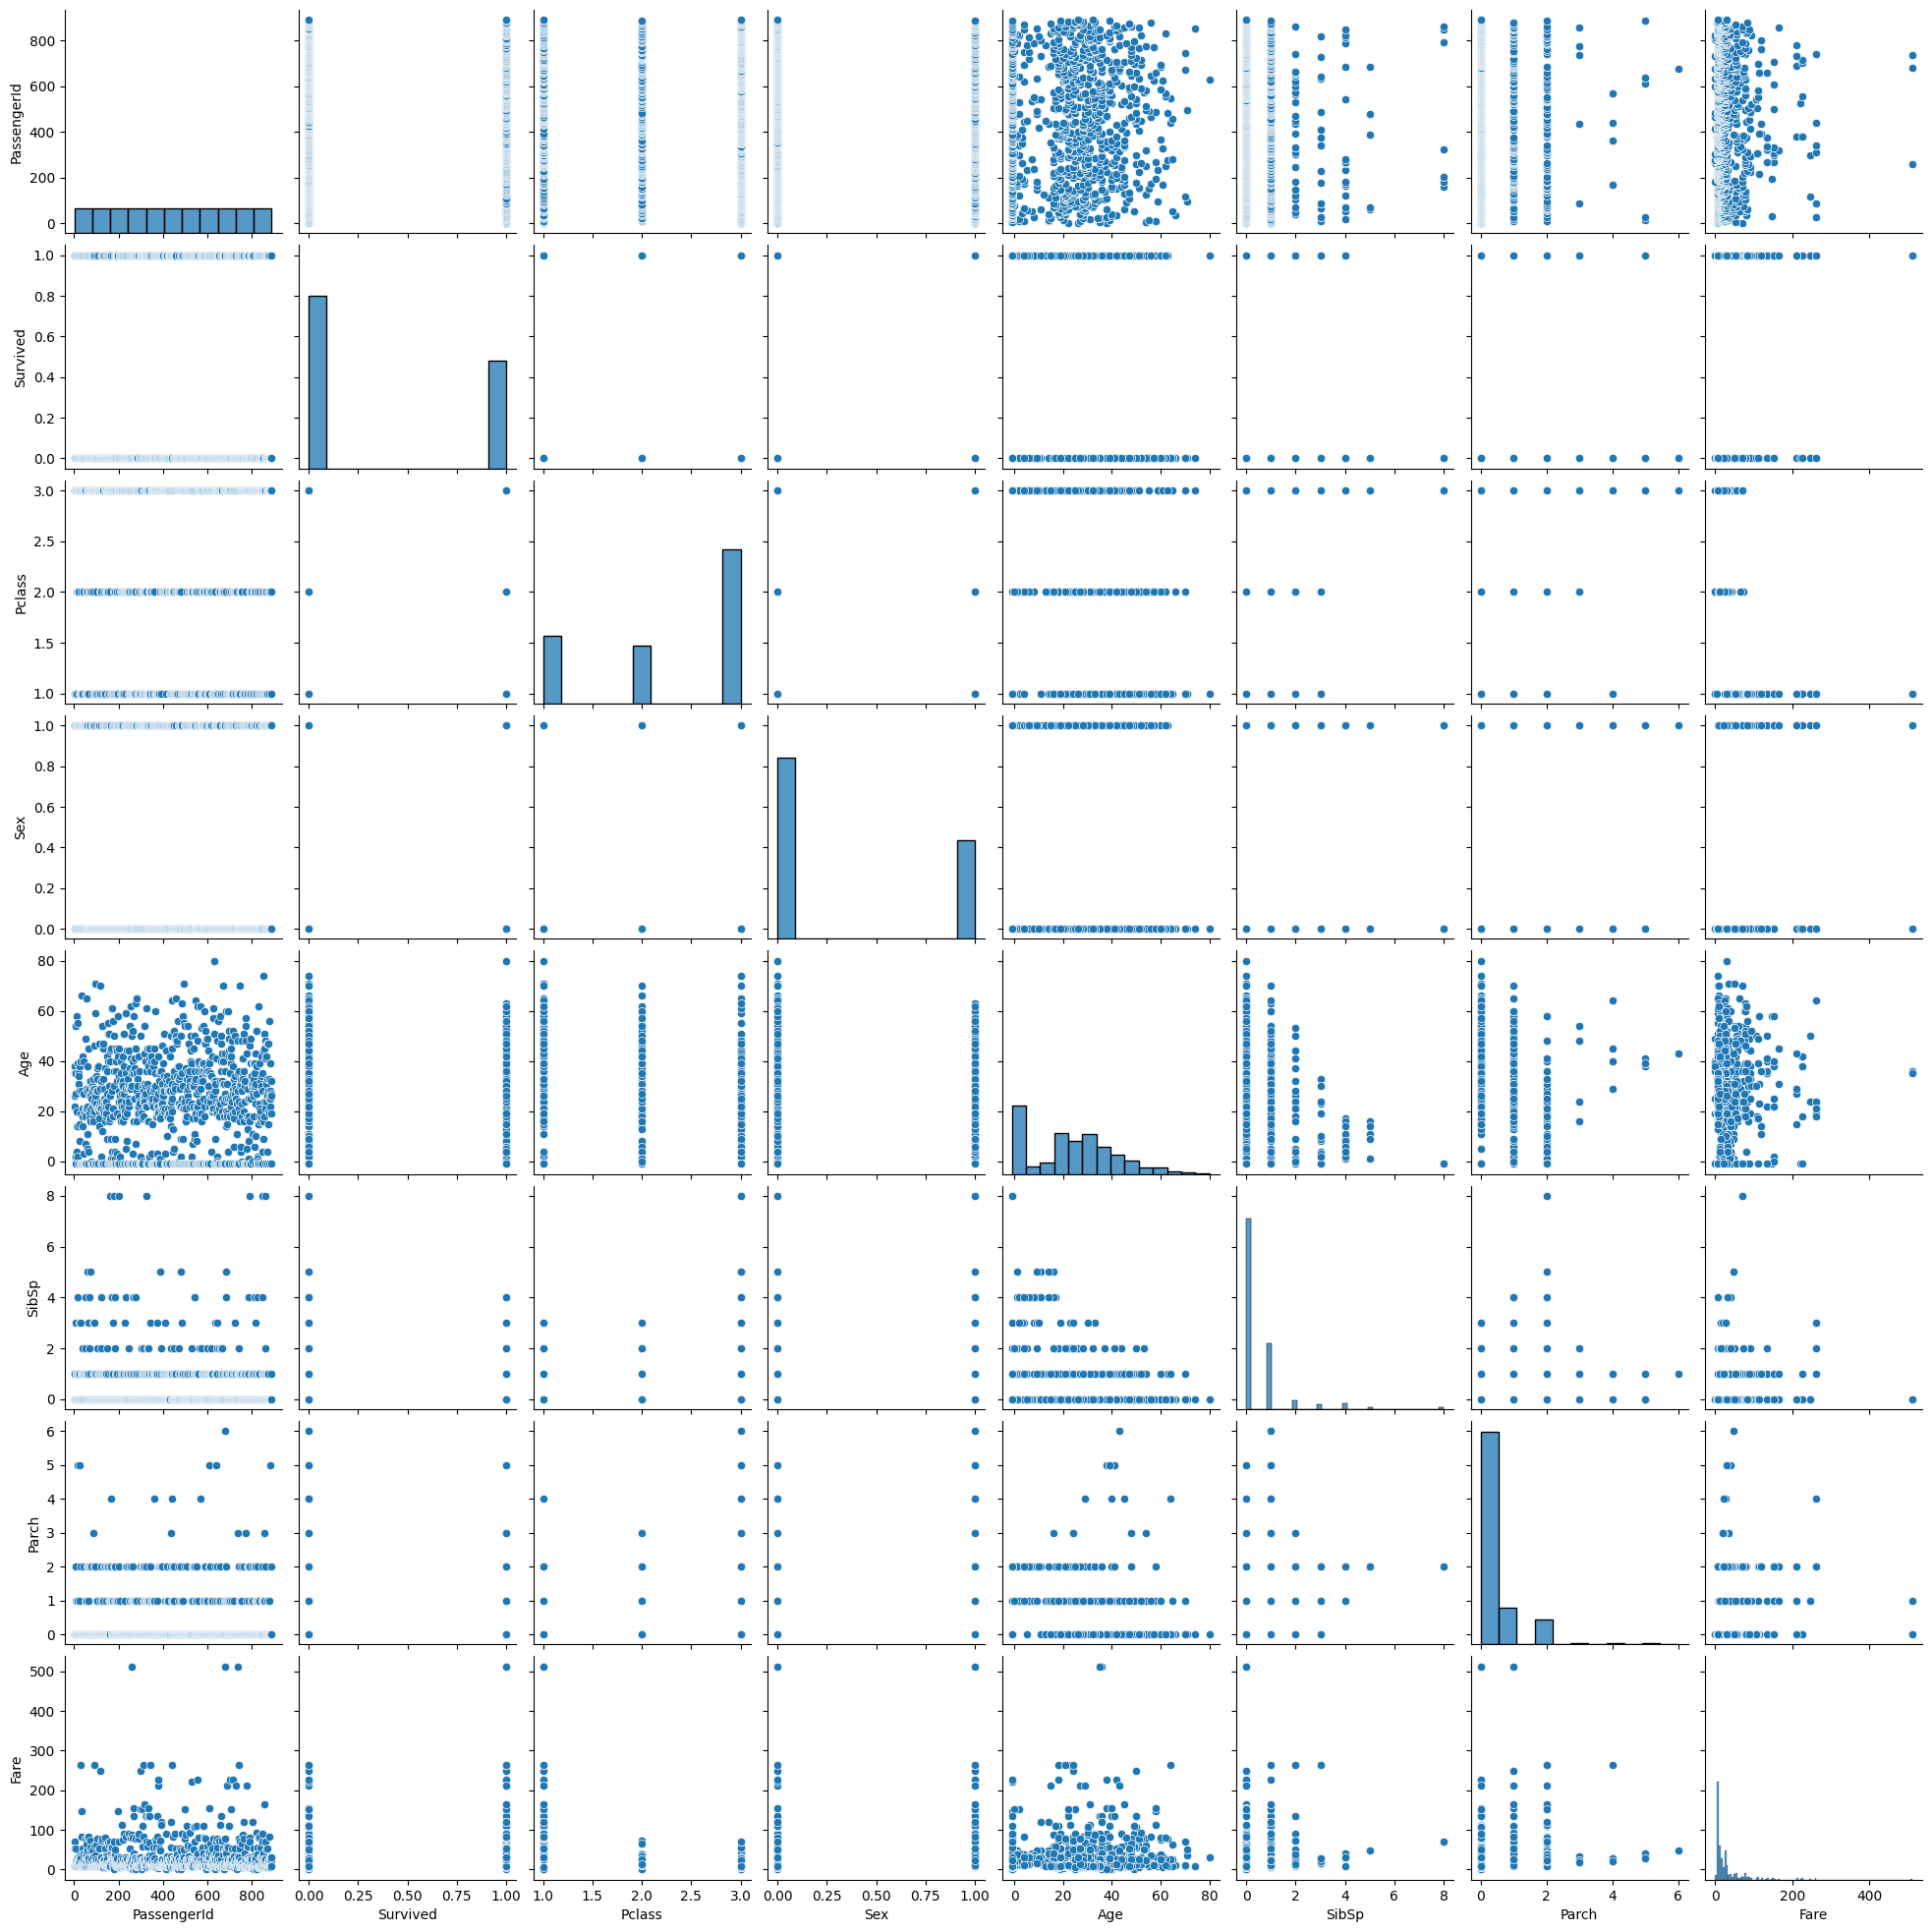

In [ ]:
#importante para conhecer mais os dados que temos disponiveis 

sns.pairplot(train) #dispersão entre as variaveis 

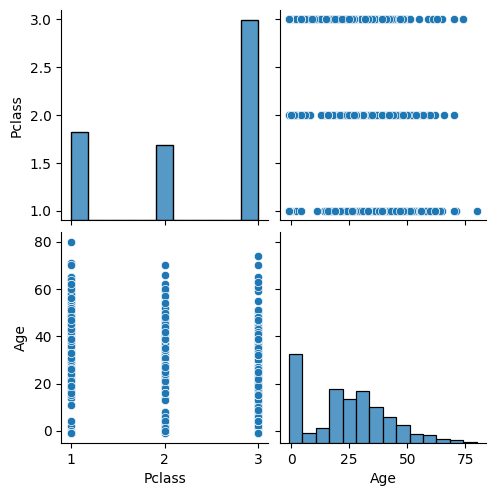

In [ ]:
#Só os dados utilizados para o modelo 

sns.pairplot(X) #dispersão entre as variaveis 

In [ ]:
#Preparando os dados em treino e teste

from sklearn.model_selection import train_test_split

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) # 30%

In [ ]:
cat = CatBoostRegressor(iterations = 50, depth= 3, learning_rate =0.1,loss_function='RMSE')

cat.fit(X_treino, y_treino,

        eval_set = (X_valid, y_valid), plot =True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 46.6207128	test: 51.3071982	best: 51.3071982 (0)	total: 358us	remaining: 17.6ms
1:	learn: 45.2945963	test: 49.9850327	best: 49.9850327 (1)	total: 602us	remaining: 14.5ms
2:	learn: 44.1609234	test: 48.8150635	best: 48.8150635 (2)	total: 808us	remaining: 12.7ms
3:	learn: 43.1703471	test: 47.7793884	best: 47.7793884 (3)	total: 1.26ms	remaining: 14.5ms
4:	learn: 42.3171324	test: 46.8531019	best: 46.8531019 (4)	total: 1.54ms	remaining: 13.8ms
5:	learn: 41.6740389	test: 46.1839281	best: 46.1839281 (5)	total: 5.4ms	remaining: 39.6ms
6:	learn: 41.1362048	test: 45.5992177	best: 45.5992177 (6)	total: 6.13ms	remaining: 37.7ms
7:	learn: 40.6662170	test: 45.0782232	best: 45.0782232 (7)	total: 6.9ms	remaining: 36.2ms
8:	learn: 40.4586451	test: 44.8322932	best: 44.8322932 (8)	total: 7.1ms	remaining: 32.4ms
9:	learn: 40.1129495	test: 44.4063936	best: 44.4063936 (9)	total: 8.04ms	remaining: 32.1ms
10:	learn: 39.8402661	test: 44.0817088	best: 44.0817088 (10)	total: 8.23ms	remaining: 29.2ms
11:

**2. Classificação**

In [ ]:
#bibliotecas
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Preparando os dados em treino e teste
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) # 30%

In [ ]:
cat_class = CatBoostClassifier(iterations = 100, random_state =0, eval_metric ="Accuracy", verbose =5)

In [ ]:
cat_class.fit(X_treino, y_treino, eval_set = (X_valid, y_valid), plot =True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.076762
0:	learn: 0.7865169	test: 0.7873134	best: 0.7873134 (0)	total: 49.6ms	remaining: 4.91s
5:	learn: 0.7945425	test: 0.7985075	best: 0.7985075 (5)	total: 51.4ms	remaining: 806ms
10:	learn: 0.7945425	test: 0.7985075	best: 0.7985075 (5)	total: 53.6ms	remaining: 434ms
15:	learn: 0.7961477	test: 0.7947761	best: 0.7985075 (5)	total: 55.3ms	remaining: 290ms
20:	learn: 0.7961477	test: 0.7947761	best: 0.7985075 (5)	total: 56.6ms	remaining: 213ms
25:	learn: 0.7945425	test: 0.7985075	best: 0.7985075 (5)	total: 59.1ms	remaining: 168ms
30:	learn: 0.7961477	test: 0.7947761	best: 0.7985075 (5)	total: 60.5ms	remaining: 135ms
35:	learn: 0.7961477	test: 0.7947761	best: 0.7985075 (5)	total: 62.1ms	remaining: 110ms
40:	learn: 0.8041734	test: 0.7873134	best: 0.7985075 (5)	total: 64.1ms	remaining: 92.2ms
45:	learn: 0.8121990	test: 0.7873134	best: 0.7985075 (5)	total: 66ms	remaining: 77.4ms
50:	learn: 0.8154093	test: 0.7910448	best: 0.7985075 (5)	total: 67.5ms	remaining: 64.8ms
55:

# **Lightgbm**


In [ ]:
#instalando

!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#bibliotecas
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) # 30%

In [ ]:
#mudando o max_depth= 7

lgbm_class = lgb.LGBMClassifier(learning_rate= 0.08, n_estimators = 1100, max_depth= 7, random_state = 0)

lgbm_class.fit(X_treino, y_treino)


In [ ]:
prev_class= lgbm_class.predict(X_valid)
print(accuracy_score(y_valid, prev_class)*100)

In [ ]:
#mudando o boosting_type para floreta aleatoria

lgbm_class = lgb.LGBMClassifier(boosting_type='rf', bagging_freq = 1, bagging_fraction = 0.9, random_state = 0)

lgbm_class.fit(X_treino, y_treino)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, boosting_type='rf',
               random_state=0)

In [ ]:
prev_class= lgbm_class.predict(X_valid)
print(accuracy_score(y_valid, prev_class)*100)

78.35820895522389


# **Ajuste de hiperparêmetros** 

In [ ]:
!pip install Scikit-Optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.1 MB/s eta 0:00:00


In [ ]:
#bibilotecas
from sklearn.model_selection import train_test_split
from skopt import dummy_minimize
import lightgbm as lgb
from sklearn import metrics
from lightgbm import LGBMClassifier

In [ ]:

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) #30%


In [ ]:

lgbm_rs = LGBMClassifier(random_state = 0)

lgbm_rs.fit(X_treino, y_treino)


LGBMClassifier(random_state=0)

In [ ]:
X

In [ ]:
prev_rs= lgbm_rs.predict(X_valid)

print(accuracy_score(y_valid, prev_rs)*100)

**Random search - Busca aleatória**

In [ ]:
#Definindo os parametros
def treinar_modelos(params):
  learning_rate = params[0] #quanto cada arvore vai contribuir
  num_leaves = params[1] #numero maximo de folhas em cada arvore
  min_child_samples = params[2] #numero de exemplos em cada nó
  subsample = [3] # fazer uma amostra dos nossos dados, ajuda a evitar o overfitting
  colsample_bytree = params[4] # não vamos deixar todas as arvores disponiíveis
  bagging_fraction = params[5]
                         
  print(params, '\n')
  modelo_3 = LGBMClassifier( learning_rate =learning_rate, num_leaves=num_leaves,
                           min_child_samples=min_child_samples, subsample=subsample,
                           colsample_bytree=colsample_bytree,bagging_fraction =bagging_fraction, 
                           random_state = 0, subsample_freq =1,
                           n_estimators= 100)
  
  lgbm_rs.fit(X_treino, y_treino)

  p= prev_rs= lgbm_rs.predict(X_valid)

  return -accuracy_score(y_valid, prev_class)

space =[(1e-3,1e-1,'log-uniform'),
        (2, 130),
        (1, 100),
        (0.03, 1.0),
        (0.1, 1.0),
        (0.1, 1.0)]

      
resultado = dummy_minimize(treinar_modelos, space, random_state = 1, verbose=1, n_calls = 30)

Iteration No: 1 started. Evaluating function at random point.


ValueError: ignored

In [ ]:
resultado.x

[0.09871192514273254,
 74,
 10,
 0.3232625954528846,
 0.23208030173540176,
 0.18310473529191804]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score (y_valid, prev_rs) #tem que ser mais proxima de 100%

0.7576190476190476

#**Curva ROC e AUC**

**Sem tunar os parametros**

In [ ]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) #30%

In [ ]:
modelo_1 = CatBoostClassifier(random_state = 0) 
modelo_2= XGBClassifier(random_state = 0) 
modelo_3 = LGBMClassifier(random_state = 0,)



In [ ]:
modelo_1.fit(X_treino, y_treino)
modelo_2.fit(X_treino, y_treino)
modelo_3.fit(X_treino, y_treino)


Learning rate set to 0.008417
0:	learn: 0.6899754	total: 483us	remaining: 483ms
1:	learn: 0.6853579	total: 941us	remaining: 470ms
2:	learn: 0.6808139	total: 1.38ms	remaining: 459ms
3:	learn: 0.6765226	total: 2.23ms	remaining: 556ms
4:	learn: 0.6723155	total: 3.09ms	remaining: 615ms
5:	learn: 0.6674438	total: 4.16ms	remaining: 690ms
6:	learn: 0.6632809	total: 5.8ms	remaining: 823ms
7:	learn: 0.6591878	total: 6.2ms	remaining: 769ms
8:	learn: 0.6551508	total: 7.04ms	remaining: 775ms
9:	learn: 0.6511962	total: 7.66ms	remaining: 758ms
10:	learn: 0.6473690	total: 8.34ms	remaining: 750ms
11:	learn: 0.6439715	total: 8.99ms	remaining: 740ms
12:	learn: 0.6406449	total: 9.45ms	remaining: 718ms
13:	learn: 0.6371285	total: 10.1ms	remaining: 715ms
14:	learn: 0.6339315	total: 11.6ms	remaining: 762ms
15:	learn: 0.6304210	total: 12.4ms	remaining: 765ms
16:	learn: 0.6271074	total: 12.9ms	remaining: 745ms
17:	learn: 0.6240937	total: 13.3ms	remaining: 726ms
18:	learn: 0.6207719	total: 13.7ms	remaining: 70

LGBMClassifier(random_state=0)

In [ ]:
prev_modelo_1 = modelo_1.predict(X_valid)
prev_modelo_2 = modelo_2.predict(X_valid)
prev_modelo_3= modelo_3.predict(X_valid)

In [ ]:
#Vizualizando a curva Roc
from sklearn.metrics import roc_curve

fpr1,tpr1,thresh1 = roc_curve(y_valid, prev_modelo_1, pos_label=1 )
fpr2,tpr2,thresh2 = roc_curve(y_valid, prev_modelo_2, pos_label=1 )
fpr3,tpr3,thresh3 = roc_curve(y_valid, prev_modelo_3, pos_label=1 )

random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label =1)

<ipython-input-112-c92c927554d4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


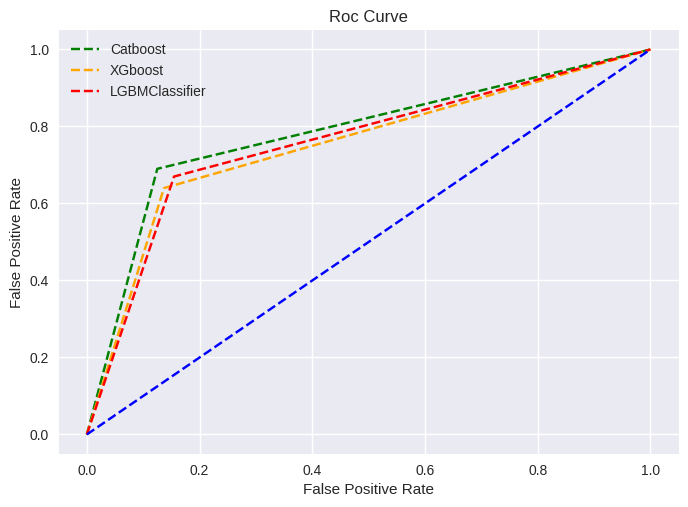

In [ ]:
import  matplotlib.pyplot as plt

plt.style.use('seaborn')

#plotando a curva

plt.plot(fpr1,tpr1, linestyle ='--', color = 'green', label= 'Catboost')
plt.plot(fpr2,tpr2, linestyle ='--', color = 'orange', label= 'XGboost')
plt.plot(fpr3,tpr3, linestyle ='--', color = 'red', label= 'LGBMClassifier')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

#titulo
plt.title( 'Roc Curve')

# o x
plt.xlabel('False Positive Rate')
# o Y
plt.ylabel('False Positive Rate')

plt.legend(loc='best')
plt.savefig('Roc', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc_1 = roc_auc_score (y_valid, prev_modelo_1)
auc_2 = roc_auc_score (y_valid, prev_modelo_2)
auc_3 = roc_auc_score (y_valid, prev_modelo_3) 

#tem que ser mais proxima de 100%

print(auc_1, auc_2, auc_3)

0.7825 0.7515476190476191 0.7576190476190476


**Mudando os Parametros**

**colocando estimadores, learning_rate, n_estimators, max_depth ja usados anteriomente**


In [ ]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) #30%

In [ ]:
modelo_1 = CatBoostClassifier(iterations = 100, random_state =0) 
modelo_2= XGBClassifier(learning_rate= 0.08, n_estimators = 300, max_depth= 4, random_state = 0) 
modelo_3 = LGBMClassifier(learning_rate = 0.08, num_leaves= 2, 
                           subsample_freq =1, n_estimators= 100, random_state = 0)

In [ ]:
modelo_1.fit(X_treino, y_treino)
modelo_2.fit(X_treino, y_treino)
modelo_3.fit(X_treino, y_treino)


Learning rate set to 0.069531
0:	learn: 0.6716755	total: 215us	remaining: 21.4ms
1:	learn: 0.6535346	total: 4.09ms	remaining: 200ms
2:	learn: 0.6336796	total: 4.76ms	remaining: 154ms
3:	learn: 0.6162352	total: 5.23ms	remaining: 126ms
4:	learn: 0.5996892	total: 5.69ms	remaining: 108ms
5:	learn: 0.5857588	total: 6.35ms	remaining: 99.4ms
6:	learn: 0.5754613	total: 6.72ms	remaining: 89.3ms
7:	learn: 0.5628257	total: 7.22ms	remaining: 83ms
8:	learn: 0.5520537	total: 7.75ms	remaining: 78.3ms
9:	learn: 0.5418274	total: 9.86ms	remaining: 88.7ms
10:	learn: 0.5330533	total: 10.4ms	remaining: 84.1ms
11:	learn: 0.5239156	total: 13.1ms	remaining: 95.8ms
12:	learn: 0.5157964	total: 13.8ms	remaining: 92.4ms
13:	learn: 0.5093122	total: 15.9ms	remaining: 97.5ms
14:	learn: 0.5039149	total: 16.3ms	remaining: 92.3ms
15:	learn: 0.4990748	total: 16.6ms	remaining: 87.2ms
16:	learn: 0.4945184	total: 19.5ms	remaining: 95.4ms
17:	learn: 0.4890424	total: 20.2ms	remaining: 92ms
18:	learn: 0.4850969	total: 21.9ms	

LGBMClassifier(learning_rate=0.08, num_leaves=2, random_state=0,
               subsample_freq=1)

In [ ]:
prev_modelo_1 = modelo_1.predict(X_valid)
prev_modelo_2 = modelo_2.predict(X_valid)
prev_modelo_3= modelo_3.predict(X_valid)

In [ ]:
#Vizualizando a curva Roc
from sklearn.metrics import roc_curve

fpr1,tpr1,thresh1 = roc_curve(y_valid, prev_modelo_1, pos_label=1 )
fpr2,tpr2,thresh2 = roc_curve(y_valid, prev_modelo_2, pos_label=1 )
fpr3,tpr3,thresh3 = roc_curve(y_valid, prev_modelo_3, pos_label=1 )

random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label =1)

<ipython-input-118-c92c927554d4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


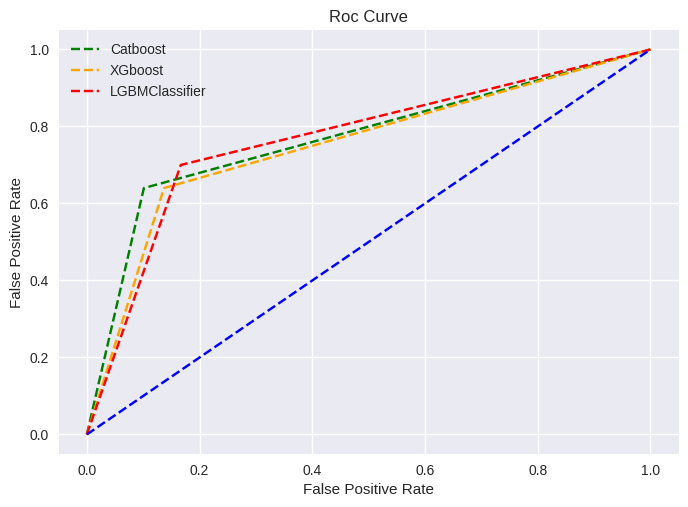

In [ ]:
import  matplotlib.pyplot as plt

plt.style.use('seaborn')

#plotando a curva

plt.plot(fpr1,tpr1, linestyle ='--', color = 'green', label= 'Catboost')
plt.plot(fpr2,tpr2, linestyle ='--', color = 'orange', label= 'XGboost')
plt.plot(fpr3,tpr3, linestyle ='--', color = 'red', label= 'LGBMClassifier')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

#titulo
plt.title( 'Roc Curve')

# o x
plt.xlabel('False Positive Rate')
# o Y
plt.ylabel('False Positive Rate')

plt.legend(loc='best')
plt.savefig('Roc', dpi=300)
plt.show()

In [ ]:
auc_1 = roc_auc_score (y_valid, prev_modelo_1)
auc_2 = roc_auc_score (y_valid, prev_modelo_2)
auc_3 = roc_auc_score (y_valid, prev_modelo_3) 

#tem que ser mais proxima de 100%

print(auc_1, auc_2, auc_3)

0.769404761904762 0.7515476190476191 0.7666666666666667


**Trocando o learning_rate do XGBClassifier de 0.08 para 0.04**

In [ ]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) #30%

In [ ]:
modelo_1 = CatBoostClassifier(iterations = 100, random_state =0) 
modelo_2= XGBClassifier(learning_rate= 0.04, n_estimators = 300, max_depth= 4, random_state = 0) 
modelo_3 = LGBMClassifier(learning_rate = 0.08, num_leaves= 2, 
                           subsample_freq =1, n_estimators= 100, random_state = 0)

In [ ]:
modelo_1.fit(X_treino, y_treino)
modelo_2.fit(X_treino, y_treino)
modelo_3.fit(X_treino, y_treino)


Learning rate set to 0.069531
0:	learn: 0.6716755	total: 445us	remaining: 44.1ms
1:	learn: 0.6535346	total: 995us	remaining: 48.8ms
2:	learn: 0.6336796	total: 4.73ms	remaining: 153ms
3:	learn: 0.6162352	total: 5.34ms	remaining: 128ms
4:	learn: 0.5996892	total: 5.81ms	remaining: 110ms
5:	learn: 0.5857588	total: 6.22ms	remaining: 97.4ms
6:	learn: 0.5754613	total: 9.27ms	remaining: 123ms
7:	learn: 0.5628257	total: 9.51ms	remaining: 109ms
8:	learn: 0.5520537	total: 9.67ms	remaining: 97.8ms
9:	learn: 0.5418274	total: 9.96ms	remaining: 89.7ms
10:	learn: 0.5330533	total: 10.1ms	remaining: 81.7ms
11:	learn: 0.5239156	total: 10.3ms	remaining: 75.5ms
12:	learn: 0.5157964	total: 10.6ms	remaining: 70.8ms
13:	learn: 0.5093122	total: 12.9ms	remaining: 79.4ms
14:	learn: 0.5039149	total: 13.1ms	remaining: 74.1ms
15:	learn: 0.4990748	total: 13.2ms	remaining: 69.4ms
16:	learn: 0.4945184	total: 13.4ms	remaining: 65.6ms
17:	learn: 0.4890424	total: 13.6ms	remaining: 62.2ms
18:	learn: 0.4850969	total: 13.8m

LGBMClassifier(learning_rate=0.08, num_leaves=2, random_state=0,
               subsample_freq=1)

In [ ]:
prev_modelo_1 = modelo_1.predict(X_valid)
prev_modelo_2 = modelo_2.predict(X_valid)
prev_modelo_3= modelo_3.predict(X_valid)

In [ ]:
#Vizualizando a curva Roc
from sklearn.metrics import roc_curve

fpr1,tpr1,thresh1 = roc_curve(y_valid, prev_modelo_1, pos_label=1 )
fpr2,tpr2,thresh2 = roc_curve(y_valid, prev_modelo_2, pos_label=1 )
fpr3,tpr3,thresh3 = roc_curve(y_valid, prev_modelo_3, pos_label=1 )

random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label =1)

<ipython-input-125-c92c927554d4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


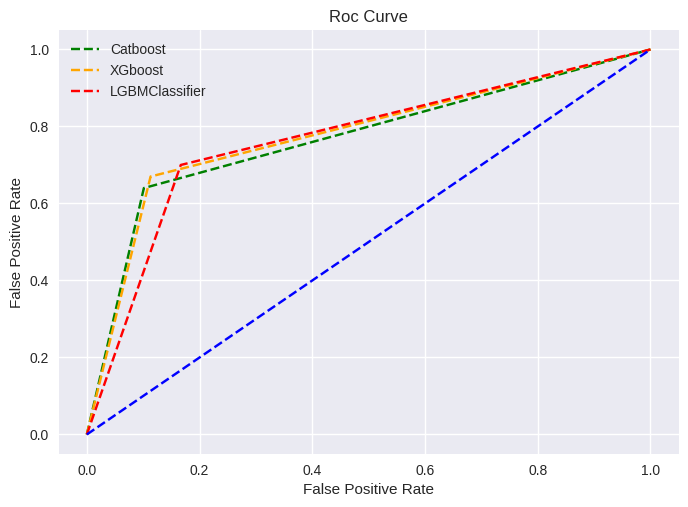

In [ ]:
import  matplotlib.pyplot as plt

plt.style.use('seaborn')

#plotando a curva

plt.plot(fpr1,tpr1, linestyle ='--', color = 'green', label= 'Catboost')
plt.plot(fpr2,tpr2, linestyle ='--', color = 'orange', label= 'XGboost')
plt.plot(fpr3,tpr3, linestyle ='--', color = 'red', label= 'LGBMClassifier')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

#titulo
plt.title( 'Roc Curve')

# o x
plt.xlabel('False Positive Rate')
# o Y
plt.ylabel('False Positive Rate')

plt.legend(loc='best')
plt.savefig('Roc', dpi=300)
plt.show()

In [ ]:
auc_1 = roc_auc_score (y_valid, prev_modelo_1)
auc_2 = roc_auc_score (y_valid, prev_modelo_2)
auc_3 = roc_auc_score (y_valid, prev_modelo_3) 

#tem que ser mais proxima de 100%

print(auc_1, auc_2, auc_3)

0.769404761904762 0.7784523809523809 0.7666666666666667


**Testando com Regressão**

In [ ]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.3, random_state= 0) #30%

In [ ]:
modelo_1 = CatBoostRegressor(random_state = 0) 
modelo_2= XGBRegressor(random_state = 0) 
modelo_3 = LGBMRegressor(random_state = 0,)



In [ ]:
modelo_1.fit(X_treino, y_treino)
modelo_2.fit(X_treino, y_treino)
modelo_3.fit(X_treino, y_treino)


Learning rate set to 0.008417
0:	learn: 0.6899754	total: 483us	remaining: 483ms
1:	learn: 0.6853579	total: 941us	remaining: 470ms
2:	learn: 0.6808139	total: 1.38ms	remaining: 459ms
3:	learn: 0.6765226	total: 2.23ms	remaining: 556ms
4:	learn: 0.6723155	total: 3.09ms	remaining: 615ms
5:	learn: 0.6674438	total: 4.16ms	remaining: 690ms
6:	learn: 0.6632809	total: 5.8ms	remaining: 823ms
7:	learn: 0.6591878	total: 6.2ms	remaining: 769ms
8:	learn: 0.6551508	total: 7.04ms	remaining: 775ms
9:	learn: 0.6511962	total: 7.66ms	remaining: 758ms
10:	learn: 0.6473690	total: 8.34ms	remaining: 750ms
11:	learn: 0.6439715	total: 8.99ms	remaining: 740ms
12:	learn: 0.6406449	total: 9.45ms	remaining: 718ms
13:	learn: 0.6371285	total: 10.1ms	remaining: 715ms
14:	learn: 0.6339315	total: 11.6ms	remaining: 762ms
15:	learn: 0.6304210	total: 12.4ms	remaining: 765ms
16:	learn: 0.6271074	total: 12.9ms	remaining: 745ms
17:	learn: 0.6240937	total: 13.3ms	remaining: 726ms
18:	learn: 0.6207719	total: 13.7ms	remaining: 70

LGBMClassifier(random_state=0)

In [ ]:
prev_modelo_1 = modelo_1.predict(X_valid)
prev_modelo_2 = modelo_2.predict(X_valid)
prev_modelo_3= modelo_3.predict(X_valid)

In [ ]:
#Vizualizando a curva Roc
from sklearn.metrics import roc_curve

fpr1,tpr1,thresh1 = roc_curve(y_valid, prev_modelo_1, pos_label=1 )
fpr2,tpr2,thresh2 = roc_curve(y_valid, prev_modelo_2, pos_label=1 )
fpr3,tpr3,thresh3 = roc_curve(y_valid, prev_modelo_3, pos_label=1 )

random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label =1)

<ipython-input-112-c92c927554d4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


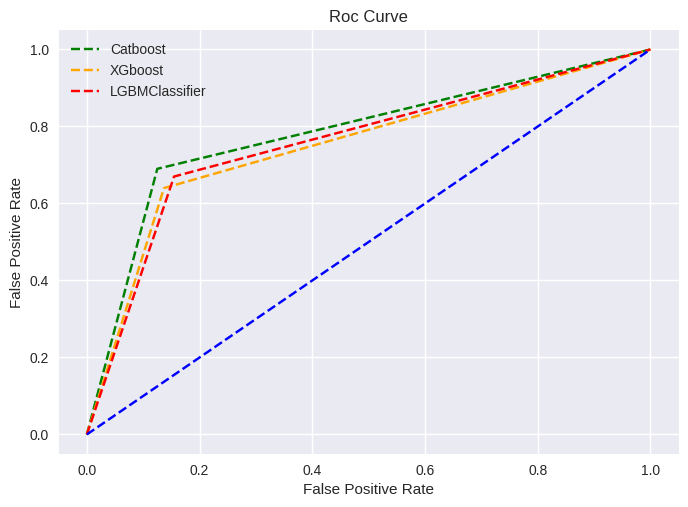

In [ ]:
import  matplotlib.pyplot as plt

plt.style.use('seaborn')

#plotando a curva

plt.plot(fpr1,tpr1, linestyle ='--', color = 'green', label= 'Catboost')
plt.plot(fpr2,tpr2, linestyle ='--', color = 'orange', label= 'XGboost')
plt.plot(fpr3,tpr3, linestyle ='--', color = 'red', label= 'LGBMClassifier')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

#titulo
plt.title( 'Roc Curve')

# o x
plt.xlabel('False Positive Rate')
# o Y
plt.ylabel('False Positive Rate')

plt.legend(loc='best')
plt.savefig('Roc', dpi=300)
plt.show()

In [ ]:
auc_1 = roc_auc_score (y_valid, prev_modelo_1)
auc_2 = roc_auc_score (y_valid, prev_modelo_2)
auc_3 = roc_auc_score (y_valid, prev_modelo_3) 

#tem que ser mais proxima de 100%

print(auc_1, auc_2, auc_3)

0.7825 0.7515476190476191 0.7576190476190476
